<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(1_6)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_1.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.6_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,73.067861,73.491761,39.451065,-39.361643,156.649044,180.494027,-23.844983
1,0.0,1.0,62.977945,23.255276,76.518955,-29.414732,143.337444,178.531964,-35.194519
2,0.0,2.0,80.046745,40.020767,84.536114,-9.153506,205.450119,220.539872,-15.089753
3,0.0,3.0,59.649537,43.306292,68.424682,3.234723,184.615234,181.796642,2.818592
4,0.0,4.0,41.756779,25.590321,69.858781,-8.295629,138.910252,151.397344,-12.487092
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,94.319879,72.839537,72.741565,-41.156795,208.744187,241.018373,-32.274187
29996,999.0,26.0,82.644544,43.111064,71.083895,13.255951,220.095454,202.943289,17.152164
29997,999.0,27.0,64.347549,52.085080,78.861404,8.285153,213.579187,211.061696,2.517491
29998,999.0,28.0,25.789025,78.366113,74.442081,-6.044175,182.553044,207.808658,-25.255614


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    73.067861  73.491761  39.451065  ...  156.649044  180.494027 -23.844983
      1.0    62.977945  23.255276  76.518955  ...  143.337444  178.531964 -35.194519
      2.0    80.046745  40.020767  84.536114  ...  205.450119  220.539872 -15.089753
      3.0    59.649537  43.306292  68.424682  ...  184.615234  181.796642   2.818592
      4.0    41.756779  25.590321  69.858781  ...  138.910252  151.397344 -12.487092
...                ...        ...        ...  ...         ...         ...        ...
999.0 25.0   94.319879  72.839537  72.741565  ...  208.744187  241.018373 -32.274187
      26.0   82.644544  43.111064  71.083895  ...  220.095454  202.943289  17.152164
      27.0   64.347549  52.085080  78.861404  ...  213.579187  211.061696   2.517491
      28.0   25.789025  78.366113  74.442081  ...  182.553044  207.808658 -25.255614
      29.0   57.200300  98.127987  94.735636  ...  322.151868  272.603097  49.548772

[30000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    73.067861  73.491761  39.451065  ...  156.649044  180.494027 -23.844983
      1.0    62.977945  23.255276  76.518955  ...  143.337444  178.531964 -35.194519
      2.0    80.046745  40.020767  84.536114  ...  205.450119  220.539872 -15.089753
      3.0    59.649537  43.306292  68.424682  ...  184.615234  181.796642   2.818592
      4.0    41.756779  25.590321  69.858781  ...  138.910252  151.397344 -12.487092
...                ...        ...        ...  ...         ...         ...        ...
999.0 25.0   94.319879  72.839537  72.741565  ...  208.744187  241.018373 -32.274187
      26.0   82.644544  43.111064  71.083895  ...  220.095454  202.943289  17.152164
      27.0   64.347549  52.085080  78.861404  ...  213.579187  211.061696   2.517491
      28.0   25.789025  78.366113  74.442081  ...  182.553044  207.808658 -25.255614
      29.0   57.200300  98.127987  94.735636  ...  322.151868  272.603097  49.548772

[30000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,73.067861,73.491761,39.451065,-39.361643,156.649044,180.494027,-23.844983
1,0.0,1.0,62.977945,23.255276,76.518955,-29.414732,143.337444,178.531964,-35.194519
2,0.0,2.0,80.046745,40.020767,84.536114,-9.153506,205.450119,220.539872,-15.089753
3,0.0,3.0,59.649537,43.306292,68.424682,3.234723,184.615234,181.796642,2.818592
4,0.0,4.0,41.756779,25.590321,69.858781,-8.295629,138.910252,151.397344,-12.487092
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,94.319879,72.839537,72.741565,-41.156795,208.744187,241.018373,-32.274187
29996,999.0,26.0,82.644544,43.111064,71.083895,13.255951,220.095454,202.943289,17.152164
29997,999.0,27.0,64.347549,52.085080,78.861404,8.285153,213.579187,211.061696,2.517491
29998,999.0,28.0,25.789025,78.366113,74.442081,-6.044175,182.553044,207.808658,-25.255614


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    73.067861  73.491761  39.451065  ...  156.649044  180.494027 -23.844983
      1.0    62.977945  23.255276  76.518955  ...  143.337444  178.531964 -35.194519
      2.0    80.046745  40.020767  84.536114  ...  205.450119  220.539872 -15.089753
      3.0    59.649537  43.306292  68.424682  ...  184.615234  181.796642   2.818592
      4.0    41.756779  25.590321  69.858781  ...  138.910252  151.397344 -12.487092
...                ...        ...        ...  ...         ...         ...        ...
999.0 25.0   94.319879  72.839537  72.741565  ...  208.744187  241.018373 -32.274187
      26.0   82.644544  43.111064  71.083895  ...  220.095454  202.943289  17.152164
      27.0   64.347549  52.085080  78.861404  ...  213.579187  211.061696   2.517491
      28.0   25.789025  78.366113  74.442081  ...  182.553044  207.808658 -25.255614
      29.0   57.200300  98.127987  94.735636  ...  322.151868  272.603097  49.548772

[30000 rows x 7 columns]

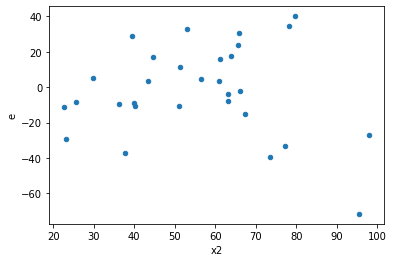

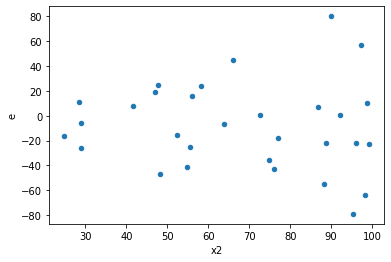

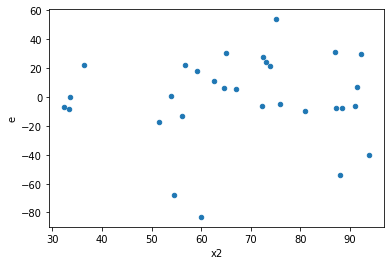

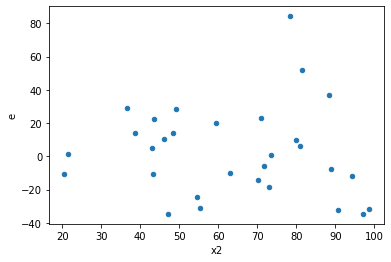

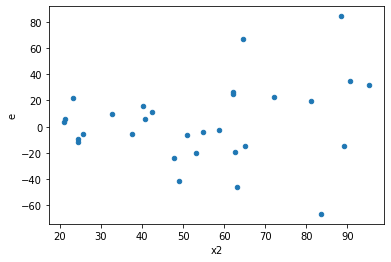

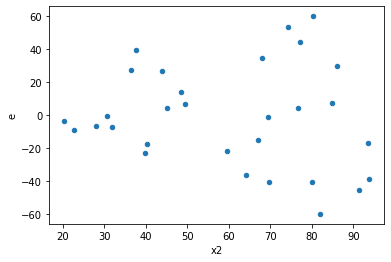

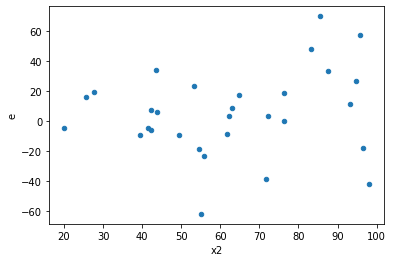

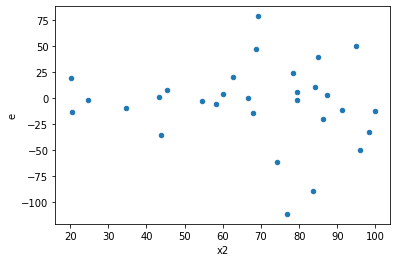

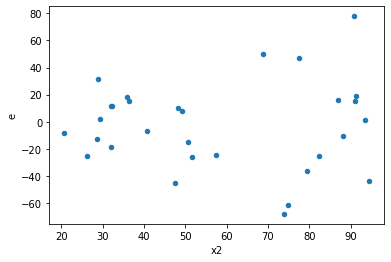

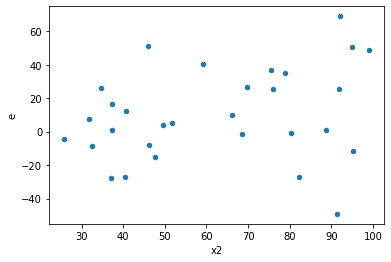

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,16.0,8.0,5364.0592981781265,7708.850083716506,335.2537061361329,963.6062604645632,2.874259830175544,0.13374864236649397,0.933125678816753,0.06687432118324699,Reject001=1 : Homoscedasticity
1.0,10.0,14.0,4766.076457352545,21097.40274759524,476.6076457352545,1506.9573391139456,3.1618404626916723,0.04909310012060031,0.9754534499396998,0.024546550060300154,Reject001=1 : Homoscedasticity
9.0,17.0,7.0,7433.225875361656,6460.516619407109,437.2485809036268,922.930945629587,2.1107694477183645,0.3192836817644702,0.8403581591177649,0.1596418408822351,Reject001=1 : Homoscedasticity
11.0,16.0,8.0,9953.020364091275,9767.498748268301,622.0637727557047,1220.9373435335376,1.9627205392862848,0.3358136631097137,0.8320931684451431,0.16790683155485686,Reject001=1 : Homoscedasticity
12.0,8.0,16.0,5225.2639361166885,19573.639203414998,653.1579920145861,1223.3524502134374,1.8729809099329187,0.27165422418027596,0.864172887909862,0.13582711209013798,Reject001=1 : Homoscedasticity
13.0,12.0,12.0,4123.552837874087,6593.85228853713,343.62940315617396,549.4876907114275,1.5990706431535904,0.4279023960390136,0.7860488019804932,0.2139511980195068,Reject001=1 : Homoscedasticity
14.0,12.0,12.0,4447.315212092905,15409.187978441867,370.6096010077421,1284.098998203489,3.4648292831913543,0.04067016950672819,0.9796649152466359,0.020335084753364097,Reject001=1 : Homoscedasticity
15.0,14.0,10.0,5859.274950610097,11219.548959622713,418.51963932929266,1121.9548959622712,2.6807700058240593,0.12227580019394191,0.938862099903029,0.061137900096970954,Reject001=1 : Homoscedasticity
17.0,15.0,9.0,6488.708030280525,9942.266025801815,432.58053535203504,1104.6962250890906,2.55373539678591,0.15849572298879933,0.9207521385056003,0.07924786149439966,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,16.0,8.0,5364.0592981781265,7708.850083716506,335.2537061361329,963.6062604645632,2.874259830175544,0.13374864236649397,Reject001=1 : Homoscedasticity
1.0,10.0,14.0,4766.076457352545,21097.40274759524,476.6076457352545,1506.9573391139456,3.1618404626916723,0.04909310012060031,Reject001=1 : Homoscedasticity
2.0,17.0,7.0,20326.01983241865,1148.9826950324687,1195.6482254363912,164.14038500463838,0.1372815026298642,0.0008181562730580614,Reject001=0 : Heteroscedasticity
3.0,10.0,14.0,10985.260259465067,6355.5588535301695,1098.5260259465067,453.96848953786923,0.4132523752878072,0.16459737536672725,Reject001=1 : Homoscedasticity
4.0,17.0,7.0,16534.18091934259,5115.064063858988,972.5988776083877,730.7234376941412,0.7513101798872973,0.5908448245665738,Reject001=1 : Homoscedasticity
5.0,13.0,11.0,12870.096888849366,8445.629575894282,990.0074529884128,767.7845068994801,0.7755340675283445,0.6549375970727748,Reject001=1 : Homoscedasticity
6.0,9.0,15.0,11614.375351274552,7586.40733869165,1290.486150141617,505.76048924611,0.3919146975661911,0.15886032829158286,Reject001=1 : Homoscedasticity
7.0,14.0,10.0,18546.711996524533,12732.279021972392,1324.7651426088953,1273.2279021972392,0.9610970739234862,0.9208822126739007,Reject001=1 : Homoscedasticity
8.0,12.0,12.0,17042.303422768306,8023.338087311076,1420.1919518973589,668.611507275923,0.4707895340363437,0.2063635425810133,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      895
Reject001=0 : Heteroscedasticity    105
Name: Result_test, dtype: int64